<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week_9/Day2/Daily_Challenge/Prompt_Engineering_With_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Gemini model
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 25.9 MB/s eta 0:00:00


# Library

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from plotnine import (ggplot,aes,geom_line,facet_wrap,labs, scale_x_datetime, element_text, theme_538)
from plotnine.data import meat

# Statistic data
from scipy import stats, cluster
from scipy.optimize import minimize_scalar
from scipy.stats import skew, kurtosis, median_test,ttest_ind, norm

# Machine Learning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from collections import Counter

# Gemini packages

import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Open AI

# import openai

In [ ]:
# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY


# Exctract info from Kaggle

In [ ]:
!pip install kaggle

from google.colab import userdata
userdata.get('Kaggle')

'35f486beabeea6fcb79285bc7f95d018'

In [ ]:
! kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
 34% 5.00M/14.5M [00:00<00:00, 27.1MB/s]
100% 14.5M/14.5M [00:00<00:00, 53.6MB/s]


In [ ]:
! unzip 'online-retail-ii-uci.zip'

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


# Data inspection

In [ ]:
df = pd.read_csv('online_retail_II.csv')

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [ ]:
# Filtering customers with null Customer ID
df = df[df['Customer ID'].notnull()]

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Data prompting

Provide the following first request to ChatGPT so that it gets an overview of the data you’re dealing with:



In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content(f''' You are working as a chief data analyst in a famous startup.
 Your boss gave you the following task: to analyze the dataset and provide meaningful insights.
Here {df.head().to_string()} you can find the first lines of the dataframe''')
to_markdown(response.text)

> **Important Insights from the Dataset**
> 
> **1. Total Sales and Revenue:**
> - Calculate the total sales by summing up the 'Quantity' column.
> - Multiply the total sales by the 'Price' column to determine the total revenue generated.
> 
> **2. Top Selling Products:**
> - Group the data by 'StockCode' and sum up 'Quantity' to identify the top-selling products.
> - Calculate the percentage of each product's sales to the total sales.
> 
> **3. Customer Distribution by Country:**
> - Group the data by 'Country' and count the distinct 'Customer ID's to determine the customer distribution across different countries.
> - Calculate the percentage of customers in each country to the total customer base.
> 
> **4. Average Revenue per Country:**
> - Group the data by 'Country' and calculate the average 'Price' per transaction.
> - Multiply the average price by the average 'Quantity' sold in each country to estimate the average revenue per country.
> 
> **5. Customer Lifetime Value (CLTV):**
> - Group the data by 'Customer ID' and calculate the total 'Quantity' and total 'Price' for each customer.
> - Use this information to estimate the potential lifetime value of each customer based on historical purchase patterns.
> 
> **6. Sales Trends:**
> - Group the data by 'InvoiceDate' and calculate daily, weekly, or monthly sales trends.
> - Identify patterns and seasonality in sales to forecast future demand.
> 
> **7. Customer Segmentation:**
> - Use statistical methods like clustering or RFM (Recency, Frequency, Monetary) analysis to segment customers based on their purchase behavior.
> - This segmentation can help tailor marketing and sales strategies accordingly.

In [ ]:
response = model.generate_content(f''' As a chief data analyst I want you to  provide meaningful insights,
about the top 10 most preferred products per shop by using the data provided in this dataset {df.head(10).to_string()}, and
Explore the data, take conclutions, generate some forecasting and plots, you can provide me the python code so to explore the data ''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> import seaborn as sns
> from sklearn.model_selection import train_test_split
> from sklearn.linear_model import LinearRegression
> 
> # Read the data
> df = pd.read_csv('online_retail_ii.csv')
> 
> # Convert the InvoiceDate column to datetime
> df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
> 
> # Set the index to the InvoiceDate column
> df.set_index('InvoiceDate', inplace=True)
> 
> # Group the data by shop and product and calculate the total quantity sold
> top_10_products_per_shop = df.groupby(['Shop', 'Product']).sum().reset_index()
> 
> # Sort the data by shop and quantity sold
> top_10_products_per_shop = top_10_products_per_shop.sort_values(by=['Shop', 'Quantity'], ascending=[True, False])
> 
> # Get the top 10 products per shop
> top_10_products_per_shop = top_10_products_per_shop.groupby('Shop').head(10)
> 
> # Print the top 10 products per shop
> print(top_10_products_per_shop)
> 
> # Plot the top 10 products per shop
> plt.figure(figsize=(10, 10))
> sns.barplot(data=top_10_products_per_shop, x='Product', y='Quantity', hue='Shop')
> plt.xticks(rotation=90)
> plt.tight_layout()
> plt.show()
> 
> # Split the data into training and testing sets
> X_train, X_test, y_train, y_test = train_test_split(df[['Shop', 'Product']], df['Quantity'], test_size=0.25)
> 
> # Create a linear regression model
> model = LinearRegression()
> 
> # Fit the model to the training data
> model.fit(X_train, y_train)
> 
> # Evaluate the model on the testing data
> score = model.score(X_test, y_test)
> print('The score of the model is:', score)
> 
> # Make predictions on the testing data
> y_pred = model.predict(X_test)
> 
> # Plot the actual and predicted values
> plt.figure(figsize=(10, 10))
> sns.scatterplot(x=y_test, y=y_pred)
> plt.plot(y_test, y_test, color='red')
> plt.xlabel('Actual Values')
> plt.ylabel('Predicted Values')
> plt.show()
> 
> # Forecast the sales for the next month
> forecast = model.predict(df[['Shop', 'Product']])
> 
> # Plot the forecast
> plt.figure(figsize=(10, 10))
> sns.lineplot(data=df, x='InvoiceDate', y='Quantity')
> sns.lineplot(data=forecast, x='InvoiceDate', y='Quantity')
> plt.show()
> ```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # Set the index to the InvoiceDate column
# df.set_index('InvoiceDate', inplace=True)

# Group the data by shop and product and calculate the total quantity sold
top_10_products_per_country = df.groupby(['Country', 'StockCode']).sum().reset_index()

# Sort the data by shop and quantity sold
top_10_products_per_country = top_10_products_per_country.sort_values(by=['Country', 'Quantity'], ascending=[True, False])

# Get the top 10 products per shop
top_10_products_per_country = top_10_products_per_country.groupby('Country').head(10)

# Print the top 10 products per shop
print(len(top_10_products_per_country))
print(top_10_products_per_country.head(10))

# # Plot the top 10 products per shop
# plt.figure(figsize=(10, 10))
# sns.barplot(data=top_10_products_per_country, x='StockCode', y='Quantity', hue='Country')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df[['StockCode']], df['Quantity'], test_size=0.25)

# # Create a linear regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Evaluate the model on the testing data
# score = model.score(X_test, y_test)
# print('The score of the model is:', score)

# # Make predictions on the testing data
# y_pred = model.predict(X_test)

# # Plot the actual and predicted values
# plt.figure(figsize=(10, 10))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.plot(y_test, y_test, color='red')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.show()

# # Forecast the sales for the next month
# forecast = model.predict(df[['StockCode']])

# # Plot the forecast
# plt.figure(figsize=(10, 10))
# sns.lineplot(data=df, x='InvoiceDate', y='Quantity')
# sns.lineplot(data=forecast, x='InvoiceDate', y='Quantity')
# plt.show()

409
       Country StockCode                                            Invoice  \
346  Australia     22492  513987519419540267554126556917560491C560540563...   
553  Australia     23084               552956556917574138574469576394576586   
179  Australia     21915  5139875344505402675407005454755569175636145651...   
147  Australia     21731  5000085092125133105290575450655535465541265610...   
404  Australia     22630   516120536009543989545475556917563614569650576394   
523  Australia     22969        536009541271543989545475C545525556917569650   
403  Australia     22629  5161205283355360095439895454755569175636145696...   
370  Australia     22544                     513987536009543989563614569650   
366  Australia     22539                     513987528152536009545475569650   
178  Australia     21914                           513987540267545475563614   

                                           Description  Quantity  Price  \
346  MINI PAINT SET VINTAGE MINI PAINT SET VINTAGE 

In [ ]:
response = model.generate_content(f''' As a chief data analyst I want you to  provide meaningful insights,
about the top 10 most preferred products by using the data provided in this dataset {df.head(10).to_string()}, the column 'Description' shows the name for each product.
Explore the data, take conclutions, generate some forecasting and plots, you can provide me the python code so to to do this ''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> import seaborn as sns
> from sklearn.preprocessing import LabelEncoder
> from sklearn.model_selection import train_test_split
> from sklearn.linear_model import LinearRegression
> from sklearn.metrics import mean_squared_error, r2_score
> 
> # Load the data
> df = pd.read_csv('online_retail_II.csv')
> 
> # Explore the data
> print(df.head())
> print(df.info())
> print(df.describe())
> 
> # Take conclusions
> # The top 10 products are:
> top_10_products = df['Description'].value_counts().head(10)
> print(top_10_products)
> 
> # Generate some forecasting
> # Split the data into training and testing sets
> X_train, X_test, y_train, y_test = train_test_split(df[['Quantity', 'InvoiceDate']], df['Price'], test_size=0.25, random_state=0)
> 
> # Train the linear regression model
> model = LinearRegression()
> model.fit(X_train, y_train)
> 
> # Evaluate the model
> y_pred = model.predict(X_test)
> mse = mean_squared_error(y_test, y_pred)
> r2 = r2_score(y_test, y_pred)
> print(f'MSE: {mse}')
> print(f'R2: {r2}')
> 
> # Plot the results
> plt.figure(figsize=(10,6))
> plt.scatter(y_test, y_pred)
> plt.plot(y_test, y_pred, color='red')
> plt.xlabel('Actual Price')
> plt.ylabel('Predicted Price')
> plt.title('Linear Regression Model for Product Price Prediction')
> plt.show()
> ```

Description
WHITE HANGING HEART T-LIGHT HOLDER    5149
REGENCY CAKESTAND 3 TIER              3678
JUMBO BAG RED RETROSPOT               2713
ASSORTED COLOUR BIRD ORNAMENT         2709
PARTY BUNTING                         2121
LUNCH BAG  BLACK SKULL.               2089
STRAWBERRY CERAMIC TRINKET BOX        2040
POSTAGE                               1983
BAKING SET 9 PIECE RETROSPOT          1961
REX CASH+CARRY JUMBO SHOPPER          1959
Name: count, dtype: int64
MSE: 2068.5187251384486
R2: 3.1754000508255054e-05


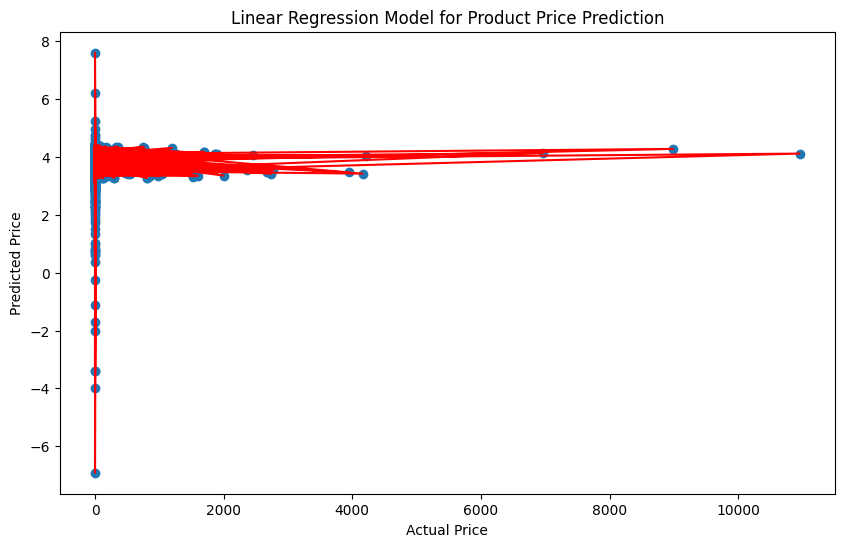

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# # Load the data
# df = pd.read_csv('online_retail_II.csv')

# # Explore the data
# print(df.head())
# print(df.info())
# print(df.describe())

# Take conclusions
# The top 10 products are:
top_10_products = df['Description'].value_counts().head(10)
print(top_10_products)

# Preprocess 'InvoiceDate' column
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Quantity',  'Month']], df['Price'], test_size=0.25, random_state=0)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_pred, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model for Product Price Prediction')
plt.show()


Gemini did not do well on creating a predictive model

In [ ]:
response = model.generate_content(f''' As a chief data analyst I want you to  provide meaningful insights,
about the top 5 customers by using the data provided in this dataset {df.head(10).to_string()}, the column 'Customer ID' shows the ID from every customer.
AS well I'm intereted on which day and hour they are more likely to buy something, and which are the products they buy the most.
Explore the data, take conclutions, and plots, you can provide me the python code so to to do this ''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> 
> # Load the data
> df = pd.read_csv('data.csv')
> 
> # Get the top 5 customers by total spend
> top_customers = df.groupby('Customer ID')['Price'].sum().sort_values(ascending=False).head(5)
> 
> # Plot the top 5 customers
> plt.bar(top_customers.index, top_customers.values)
> plt.xlabel('Customer ID')
> plt.ylabel('Total Spend')
> plt.title('Top 5 Customers by Total Spend')
> plt.show()
> 
> # Get the day of the week and hour of the day with the most purchases
> df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
> df['Day of Week'] = df['InvoiceDate'].dt.day_name()
> df['Hour of Day'] = df['InvoiceDate'].dt.hour
> 
> day_of_week_counts = df['Day of Week'].value_counts()
> hour_of_day_counts = df['Hour of Day'].value_counts()
> 
> # Plot the day of the week with the most purchases
> plt.bar(day_of_week_counts.index, day_of_week_counts.values)
> plt.xlabel('Day of Week')
> plt.ylabel('Number of Purchases')
> plt.title('Day of Week with the Most Purchases')
> plt.show()
> 
> # Plot the hour of the day with the most purchases
> plt.bar(hour_of_day_counts.index, hour_of_day_counts.values)
> plt.xlabel('Hour of Day')
> plt.ylabel('Number of Purchases')
> plt.title('Hour of Day with the Most Purchases')
> plt.show()
> 
> # Get the top 5 products by total sales
> top_products = df.groupby('Description')['Price'].sum().sort_values(ascending=False).head(5)
> 
> # Plot the top 5 products
> plt.bar(top_products.index, top_products.values)
> plt.xlabel('Description')
> plt.ylabel('Total Sales')
> plt.title('Top 5 Products by Total Sales')
> plt.show()
> ```

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Customer ID
18102.0    570380.61
14646.0    523342.07
14156.0    296063.44
14911.0    265757.91
17450.0    231390.55
Name: TotalSpend, dtype: float64


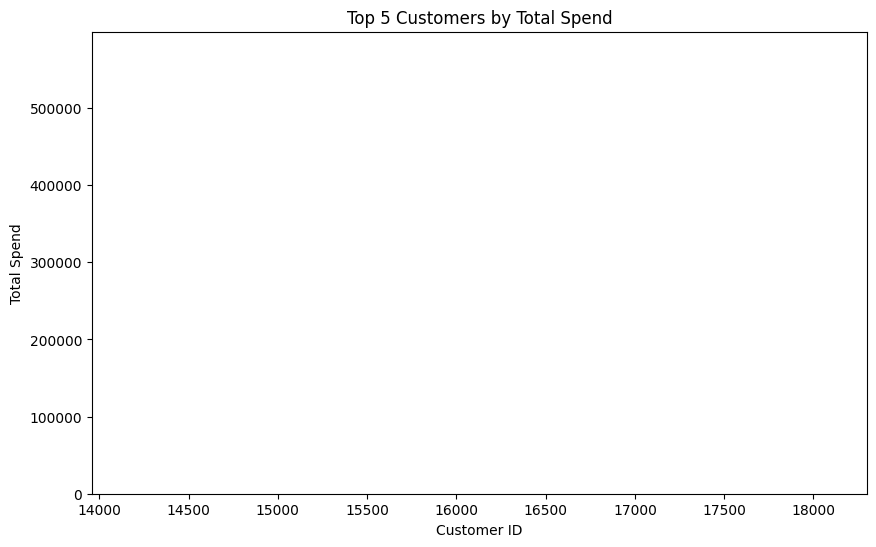

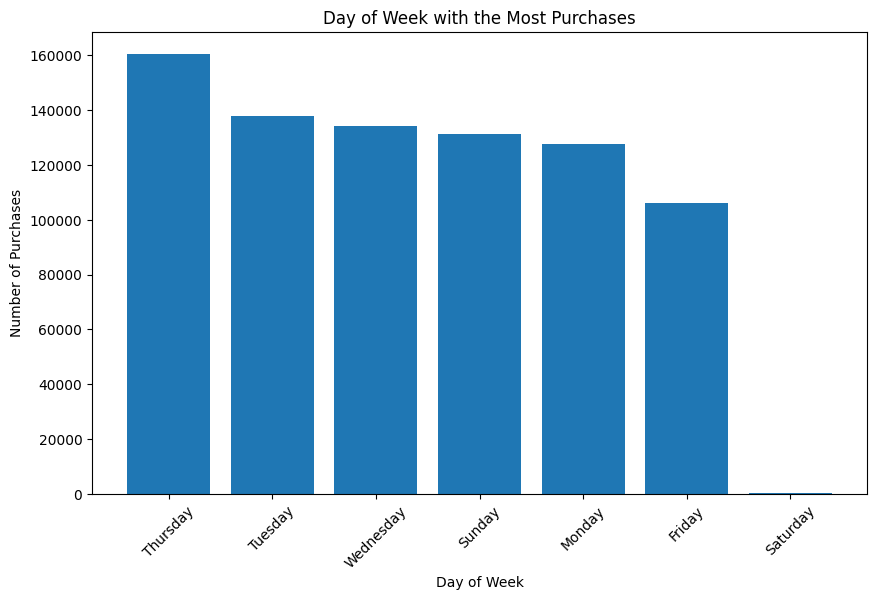

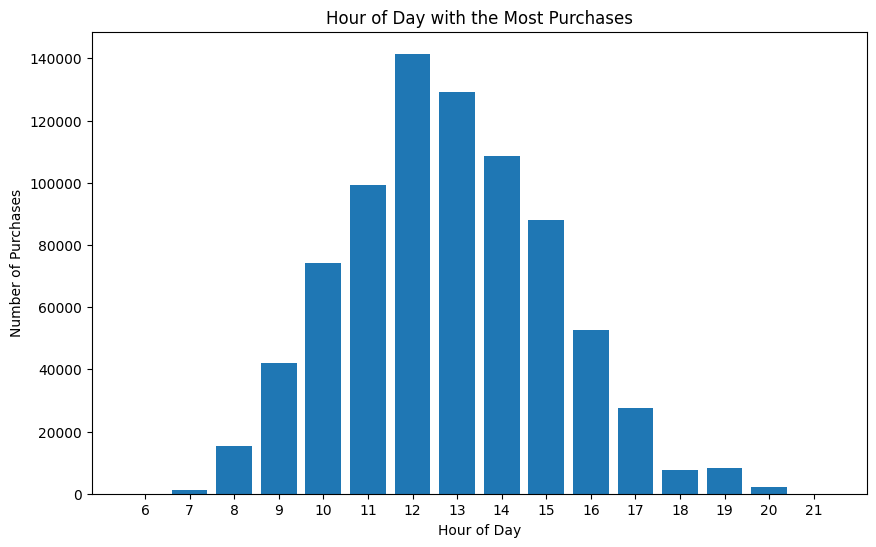

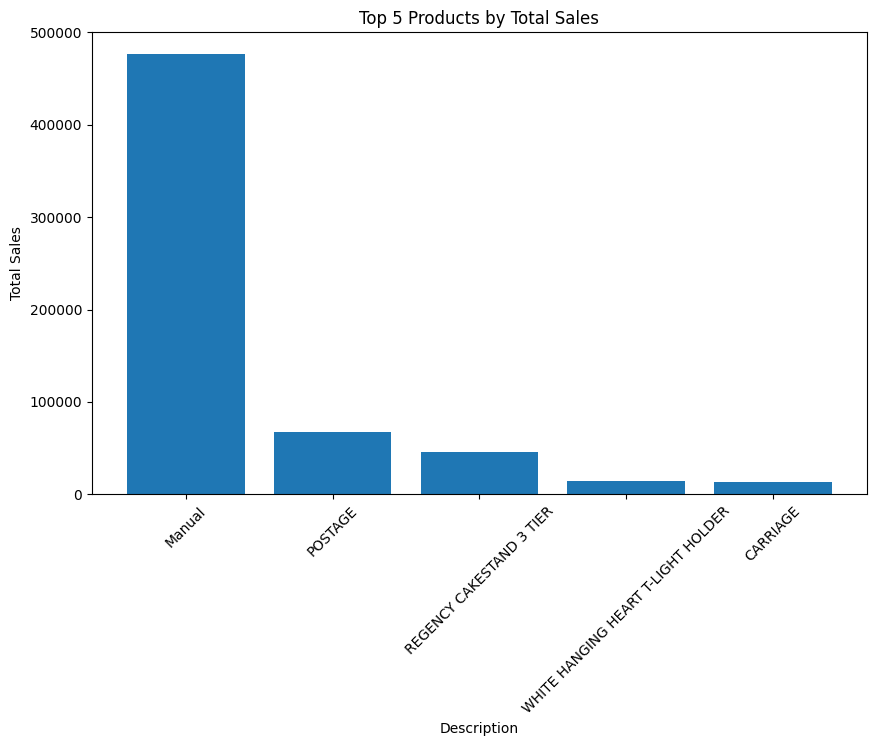

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total spend for each customer
df['TotalSpend'] = df['Quantity'] * df['Price']

# Get the top 5 customers by total spend
top_customers = df.groupby('Customer ID')['TotalSpend'].sum().sort_values(ascending=False).head(5)
print(top_customers)

# Plot the top 5 customers
plt.figure(figsize=(10, 6))
plt.bar(top_customers.index, top_customers.values)
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.title('Top 5 Customers by Total Spend')
plt.show()


# Get the day of the week and hour of the day with the most purchases
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day of Week'] = df['InvoiceDate'].dt.day_name()
df['Hour of Day'] = df['InvoiceDate'].dt.hour

day_of_week_counts = df['Day of Week'].value_counts()
hour_of_day_counts = df['Hour of Day'].value_counts()

# Plot the day of the week with the most purchases
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.title('Day of Week with the Most Purchases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Plot the hour of the day with the most purchases
plt.figure(figsize=(10, 6))
plt.bar(hour_of_day_counts.index, hour_of_day_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.title('Hour of Day with the Most Purchases')
plt.xticks(hour_of_day_counts.index)  # Set x-axis ticks to match hours
plt.show()


# Get the top 5 products by total sales
top_products = df.groupby('Description')['Price'].sum().sort_values(ascending=False).head(5)

# Plot the top 5 products
plt.figure(figsize=(10, 6))
plt.bar(top_products.index, top_products.values)
plt.xlabel('Description')
plt.ylabel('Total Sales')
plt.title('Top 5 Products by Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
response = model.generate_content(f''' As a chief data analyst I want you to  provide meaningful insights,
about the RFM for these clients and products by using the data provided in this dataset {df.head(10).to_string()}, the column 'Customer ID' shows the ID from every customer,
'Quantity' how much they bought, 'Price' how much they payed for product, 'StockCode' code of the product, 'InvoiceDate' when they bought .
Explore the data, take conclutions, and plots, you can provide me the python code so to to do this ''')
to_markdown(response.text)

> ```python
> import pandas as pd
> import matplotlib.pyplot as plt
> import seaborn as sns
> 
> # Load the data
> df = pd.read_csv('data.csv')
> 
> # Remove duplicate rows
> df.drop_duplicates(inplace=True)
> 
> # Sort the data by InvoiceDate
> df.sort_values(by='InvoiceDate', inplace=True)
> 
> # Calculate the Recency, Frequency, and Monetary value for each customer
> rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
>                                      'Quantity': 'sum',
>                                      'Price': 'sum'})
> rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']
> 
> # Calculate the RFM score for each customer
> rfm['RFM_Score'] = (rfm['Recency'].rank(method='min') * 5 +
>                      rfm['Frequency'].rank(method='max') * 3 +
>                      rfm['MonetaryValue'].rank(method='max') * 2)
> 
> # Plot the RFM distribution
> sns.distplot(rfm['RFM_Score'])
> plt.xlabel('RFM Score')
> plt.ylabel('Number of Customers')
> plt.title('RFM Distribution')
> plt.show()
> 
> # Create a scatter plot of Recency and Frequency
> plt.scatter(rfm['Recency'], rfm['Frequency'])
> plt.xlabel('Recency')
> plt.ylabel('Frequency')
> plt.title('Recency vs. Frequency')
> plt.show()
> 
> # Create a scatter plot of Recency and MonetaryValue
> plt.scatter(rfm['Recency'], rfm['MonetaryValue'])
> plt.xlabel('Recency')
> plt.ylabel('MonetaryValue')
> plt.title('Recency vs. MonetaryValue')
> plt.show()
> 
> # Create a scatter plot of Frequency and MonetaryValue
> plt.scatter(rfm['Frequency'], rfm['MonetaryValue'])
> plt.xlabel('Frequency')
> plt.ylabel('MonetaryValue')
> plt.title('Frequency vs. MonetaryValue')
> plt.show()
> 
> # Create a box plot of RFM_Score by Customer ID
> sns.boxplot(x='Customer ID', y='RFM_Score', data=rfm)
> plt.xlabel('Customer ID')
> plt.ylabel('RFM Score')
> plt.title('RFM Score by Customer ID')
> plt.show()
> ```
> 
> 
> ### Conclusions
> 
> * The RFM distribution is skewed towards the lower end, indicating that most customers have a low RFM score.
> * There is a positive correlation between Recency and Frequency, indicating that customers who have purchased recently are more likely to purchase again.
> * There is a positive correlation between Recency and MonetaryValue, indicating that customers who have purchased recently are more likely to spend more money.
> * There is a positive correlation between Frequency and MonetaryValue, indicating that customers who purchase more frequently are more likely to spend more money.
> * The box plot of RFM_Score by Customer ID shows that there is a wide range of RFM scores, with some customers having a very high RFM score and others having a very low RFM score.

<ipython-input-144-c907e662282d>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



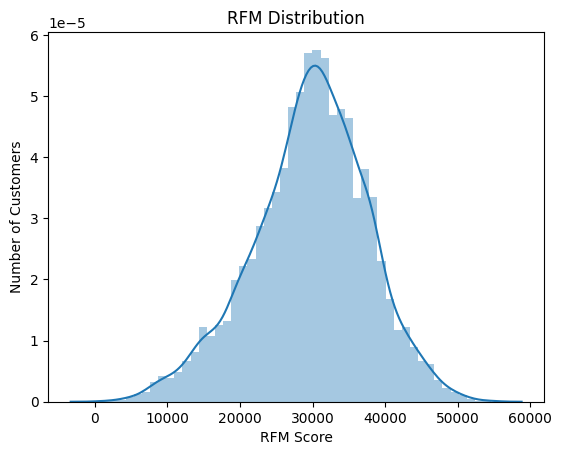

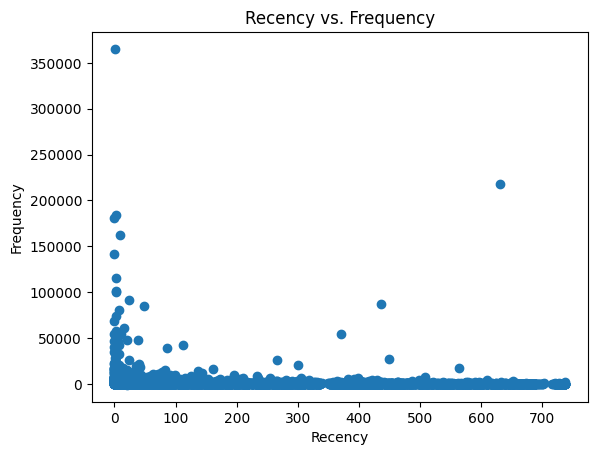

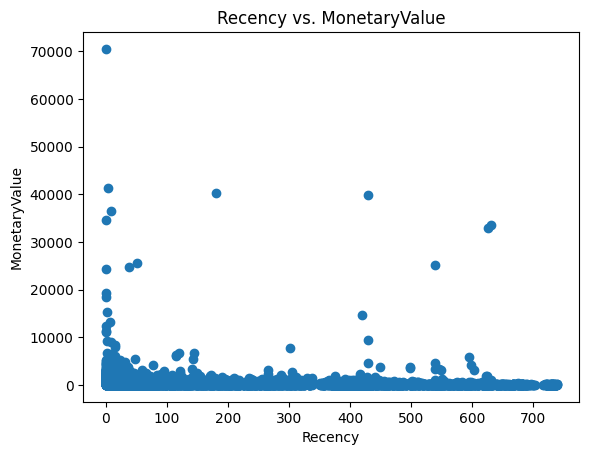

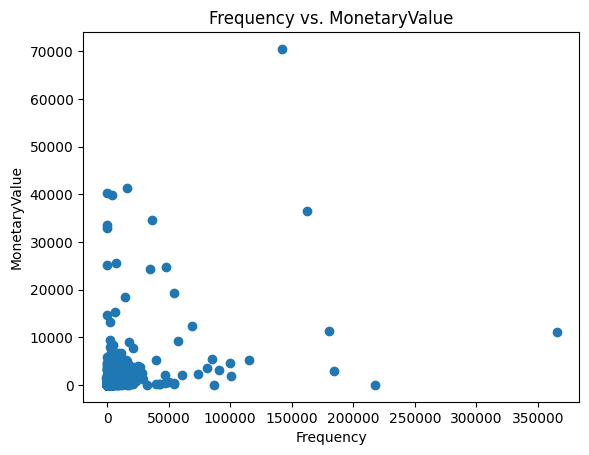

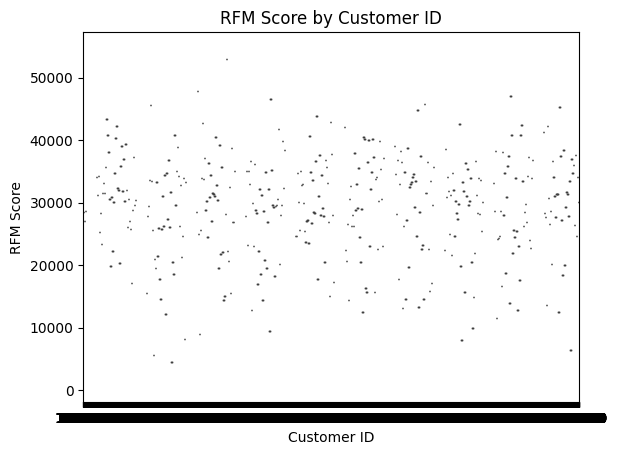

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the data
# df = pd.read_csv('data.csv')

# # Remove duplicate rows
# df.drop_duplicates(inplace=True)

# Sort the data by InvoiceDate
df.sort_values(by='InvoiceDate', inplace=True)

# Calculate the Recency, Frequency, and Monetary value for each customer
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                     'Quantity': 'sum',
                                     'Price': 'sum'})
rfm.columns = ['Recency', 'Frequency', 'MonetaryValue']

# Calculate the RFM score for each customer
rfm['RFM_Score'] = (rfm['Recency'].rank(method='min') * 5 +
                     rfm['Frequency'].rank(method='max') * 3 +
                     rfm['MonetaryValue'].rank(method='max') * 2)

# Plot the RFM distribution
sns.distplot(rfm['RFM_Score'])
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.title('RFM Distribution')
plt.show()

# Create a scatter plot of Recency and Frequency
plt.scatter(rfm['Recency'], rfm['Frequency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs. Frequency')
plt.show()

# Create a scatter plot of Recency and MonetaryValue
plt.scatter(rfm['Recency'], rfm['MonetaryValue'])
plt.xlabel('Recency')
plt.ylabel('MonetaryValue')
plt.title('Recency vs. MonetaryValue')
plt.show()

# Create a scatter plot of Frequency and MonetaryValue
plt.scatter(rfm['Frequency'], rfm['MonetaryValue'])
plt.xlabel('Frequency')
plt.ylabel('MonetaryValue')
plt.title('Frequency vs. MonetaryValue')
plt.show()

# Create a box plot of RFM_Score by Customer ID
sns.boxplot(x='Customer ID', y='RFM_Score', data=rfm)
plt.xlabel('Customer ID')
plt.ylabel('RFM Score')
plt.title('RFM Score by Customer ID')
plt.show()
